<a href="https://colab.research.google.com/github/AustroPa/T.SopInfor_Incutti-Fernandez/blob/main/Ejercicio2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
import pandas as pd
import numpy as np

def arreglar_Protas(columnas):
  columnas = str(columnas)
  if columnas == "Male":
      columnas = "M"
  elif columnas == "Female":
      columnas = "F"
  else:
      columnas = "O"
  return columnas

def arreglar_Fechas(columnas):
  columnas = str(columnas)
  if "-" not in columnas :
    columnas = np.nan
  return columnas

def quitarSigno(columnas):
  columas =str(columnas)
  if columnas[0] == "$":
      columnas = columnas[1:]
  return columnas

def arreglar_centavos(columnas):
  columnas=str(columnas)
  for i in range(len(columnas)-3):
    if columnas[i] == ".":
      columnas=columnas[0:i]
  return columnas


csv = pd.read_csv("/content/MCU Movies.csv")
csvColumnas = list(csv.columns)

csv["Lead Role"] = csv["Lead Role"].apply(arreglar_Protas)
csv["Release Date (USA)"]= csv["Release Date (USA)"].apply(arreglar_Fechas)
csv["Production Budget"]=csv["Production Budget"].apply(quitarSigno)
csv["Production Budget"]=csv["Production Budget"].apply(arreglar_centavos)
csv["Total Box Office Earnings"]=csv["Total Box Office Earnings"].apply(quitarSigno)
csv["Total Box Office Earnings"]=csv["Total Box Office Earnings"].apply(arreglar_centavos)
# Elimino comas from the 'Total Box Office Earnings' column
csv['Total Box Office Earnings'] = csv['Total Box Office Earnings'].str.replace(',', '')


print(csv)
csv.to_csv('./Modificado.csv')

                                    Movie Title Release Date (USA)  Phase  \
0            Captain America: The First Avenger        22-Jul-2011      1   
1                                Captain Marvel         8-Mar-2019      3   
2                                      Iron Man         2-May-2008      1   
3                                    Iron Man 2         7-May-2010      1   
4                           The Incredible Hulk        13-Jun-2008      1   
5                                          Thor         6-May-2011      1   
6                                  The Avengers         4-May-2012      1   
7                          Thor: The Dark World         8-Nov-2013      2   
8                                    Iron Man 3         3-May-2013      2   
9           Captain America: The Winter Soldier         4-Apr-2014      2   
10                      Guardians of the Galaxy         1-Aug-2014      2   
11                Guardians of the Galaxy Vol.2         5-May-2017      3   

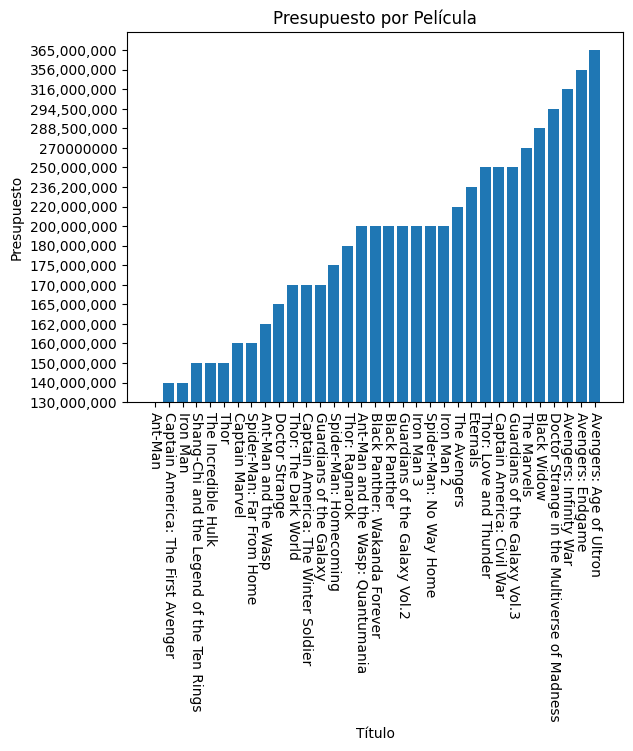

In [130]:
import matplotlib.pyplot as plt

# Ordena los datos de menor a mayor
csv = csv.sort_values(by='Production Budget')

plt.bar(csv['Movie Title'], csv['Production Budget'])

plt.title('Presupuesto por Película')
plt.xlabel('Título')
plt.ylabel('Presupuesto')
plt.xticks(rotation=-90)

plt.show()

# En conclusion podemos decir que la pelicula con mas presupuesto fue "Avengers: Age of Ultron"

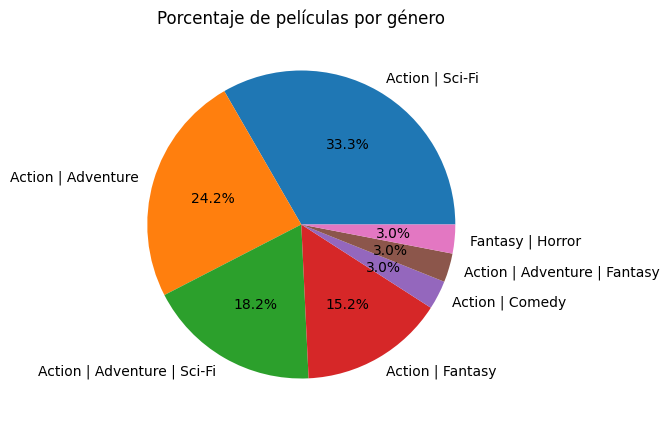

Action | Sci-Fi                 11
Action | Adventure               8
Action | Adventure | Sci-Fi      6
Action | Fantasy                 5
Action | Comedy                  1
Action | Adventure | Fantasy     1
Fantasy | Horror                 1
Name: Genre, dtype: int64


In [ ]:
import matplotlib.pyplot as plt

genre_counts = csv['Genre'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%')
plt.title('Porcentaje de películas por género')

plt.show()
print(genre_counts)

#En conclusion podemos decir que la mayoria de pelicualas en el MCU es de Accion | Ciencia Ficcion

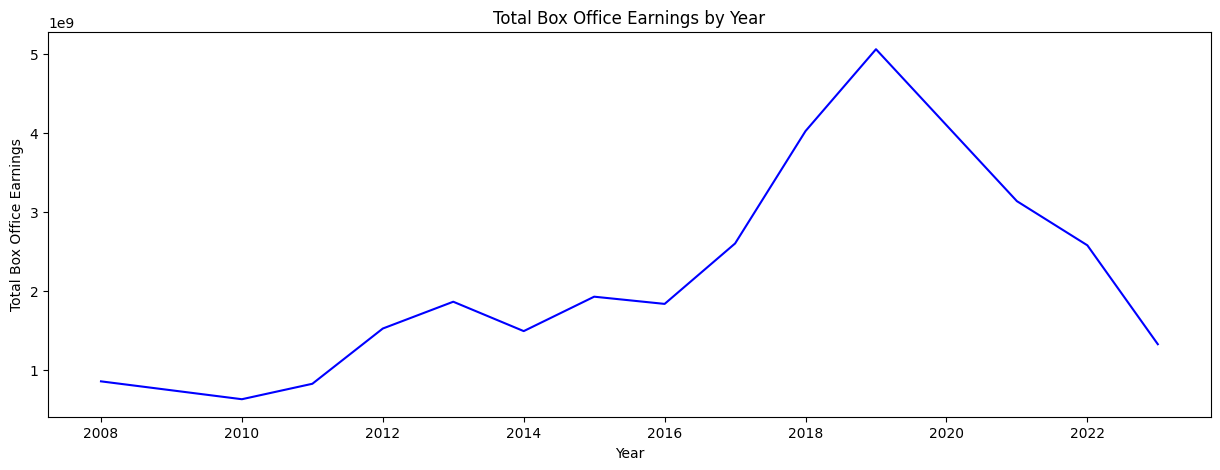

In [131]:
# prompt: genera un grafico de linea con el eje x sea el año de estreno y el eje y sea el total ganado ese año osea Total Box Office Earnings
import matplotlib.pyplot as plt1
csv['Release Date (USA)'] = pd.to_datetime(csv['Release Date (USA)'])
csv['Year'] = csv['Release Date (USA)'].dt.year


# Group the data by year and sum the 'Total Box Office Earnings' column
csv['Total Box Office Earnings'] = csv['Total Box Office Earnings'].astype(int)
yearly_earnings = csv.groupby('Year')['Total Box Office Earnings'].sum()

# Create a line plot of the yearly earnings
plt1.figure(figsize=(15, 5))
yearly_earnings.plot(color = "blue", label= "Grafico 2")

plt1.xlabel('Year')
plt1.ylabel('Total Box Office Earnings')
plt1.title('Total Box Office Earnings by Year')


plt1.show()

#En conclusion podemos decir que el año con mas ingresos tubo Marvel fue el año 2019